# Notebook loads the face_recognition app to check for possibility of applying saliency maps on faces

### Load the jpg file into a numpy array

In [1]:
import math
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import face_recognition


In [2]:
# image = face_recognition.load_image_file("../imgs/biden.jpg")
image = face_recognition.load_image_file("../imgs/baby1.png")
# image = face_recognition.load_image_file("../imgs/1.jpg")

### Find all the faces in the image using the default HOG-based model.

In [3]:
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 1 face(s) in this photograph.


In [4]:
# face_landmarks_list = face_recognition.face_landmarks(image)
# face_landmarks_list

# remark: to complicated to just use ad-hoc

In [5]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    cv2.rectangle(image, (left, top), ( right, bottom ), (255,0,0), 2)
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    

A face is located at pixel location Top: 80, Left: 151, Bottom: 187, Right: 259


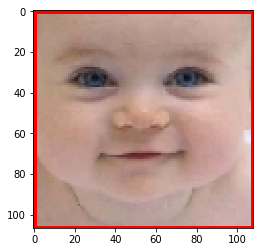

In [6]:
plt.imshow(pil_image);

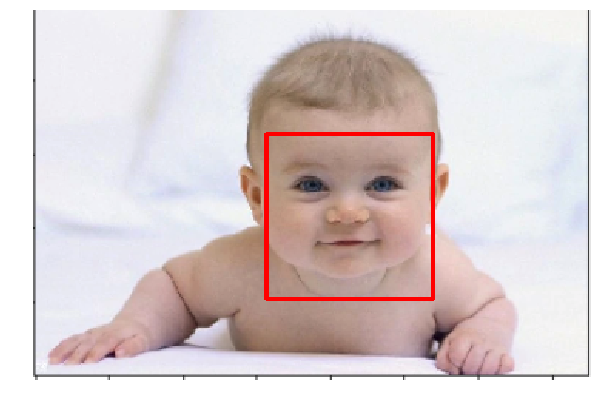

In [7]:
plt.subplots(figsize=(10, 20))
plt.imshow(image);
plt.axis('off')

plt.savefig('../results/plots/face_detection_baby.jpg', bbox_inches='tight', pad_inches=0)

### Find the center of the frame

In [8]:
x_center = np.ceil((right - left)/2 + left)
x_center

205.0

In [9]:
y_center = np.ceil((bottom - top)/2 + top)
y_center

134.0

### Generate a 2D gaussian to fit onto face

In [10]:
def gaussian2D(x, y, sigma):
    '''create 2D Gaussian distribution'''
    return (1.0/(2*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))


def mexican_hat(x, y, sigma1, sigma2):
    ''' @ gausain mixture(difference) creates mexican hat like shape '''
    return gaussian2D(x, y, sigma1) - gaussian2D(x, y, sigma2)


# TODO: basically a copy of the receptive field function - combine them!
def center_bias(func, mapsize):
    """make matrix from function"""
    g = np.zeros(mapsize)
    for xi in range(0, mapsize[0]):
        for yi in range(0,mapsize[1]):
            x = xi-mapsize[0]/2
            y = yi-mapsize[1]/2
            g[xi, yi] = func(x, y)
    # normalize to a height of one
    g = g / np.max(g)
    return g

1.0


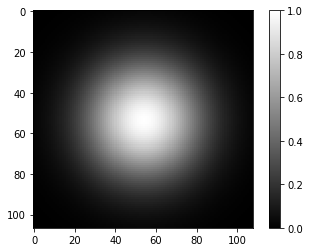

In [11]:
center = center_bias(lambda x, y: gaussian2D(x, y, sigma=20), np.shape(pil_image))
print(np.max(center))
plt.imshow(center, vmin=0, vmax=1, cmap='gray');
plt.colorbar();

### Apply saliency of the face

In [12]:
face_saliency = np.zeros_like(image, dtype='float64')


In [13]:
cv2.rectangle(face_saliency, (left, top), ( right, bottom ), (255,0,0), 2)
# face_image = image[top:bottom, left:right]
# pil_image = Image.fromarray(face_image)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [14]:
face_saliency[top:bottom, left:right] = center
print(np.max(face_saliency))
print(np.min(face_saliency))

255.0
0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


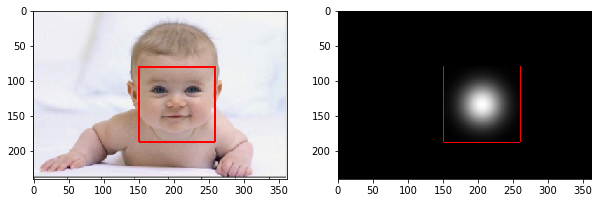

In [15]:
fig, ax =plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
ax[0].imshow(image);
ax[1].imshow(face_saliency, cmap='gray', vmin=0, vmax=1);